# 集団学習


## バギング


### ライブラリのインストール


In [2]:
install.packages("adabag")
install.packages("mlbench")



The downloaded binary packages are in
	/var/folders/4x/vf52k2q52wx0sqrm0t5hfr040000gn/T//RtmpZLD3ma/downloaded_packages

The downloaded binary packages are in
	/var/folders/4x/vf52k2q52wx0sqrm0t5hfr040000gn/T//RtmpZLD3ma/downloaded_packages


In [3]:
library("adabag")
library("mlbench")


 要求されたパッケージ rpart をロード中です 

 要求されたパッケージ caret をロード中です 

 要求されたパッケージ ggplot2 をロード中です 

 要求されたパッケージ lattice をロード中です 

 要求されたパッケージ foreach をロード中です 

 要求されたパッケージ doParallel をロード中です 

 要求されたパッケージ iterators をロード中です 

 要求されたパッケージ parallel をロード中です 



### データの読み込み


In [4]:
data("BreastCancer")


In [5]:
x <- na.omit(BreastCancer)
x


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
,<chr>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign
6,1017122,8,10,10,8,7,10,9,7,1,malignant
7,1018099,1,1,1,1,2,10,3,1,1,benign
8,1018561,2,1,2,1,2,1,3,1,1,benign
9,1033078,2,1,1,1,2,1,1,1,5,benign


In [6]:
t <- floor(nrow(x) / 2)
even.n = 2 * (1:t)
BC.train = BreastCancer[even.n, -1]
BC.test = BreastCancer[-even.n, -1]

for (i in 1:9) {
    BC.train[, i] <- as.integer(BC.train[, i])
    BC.test[, i] <- as.integer(BC.test[, i])
}


### 分析してみよう


In [7]:
set.seed(20)
BC.ba = bagging(Class ~ ., data = BC.train)
BC.bap = predict(BC.ba, BC.test)
tb.ba = table(BC.test[, 10], BC.bap$class)


In [8]:
tb.ba





           
            benign malignant
  benign       225         8
  malignant      3       122

In [9]:
sum(diag(tb.ba)) / sum(tb.ba)


[1] 0.9692737

In [10]:
1 - (sum(diag(tb.ba)) / sum(tb.ba))


[1] 0.03072626

In [11]:
BC.ba$trees


[[1]]
n= 341 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 341 113 benign (0.66862170 0.33137830)  
  2) Cell.size< 2.5 224   8 benign (0.96428571 0.03571429)  
    4) Cl.thickness< 6.5 216   0 benign (1.00000000 0.00000000) *
    5) Cl.thickness>=6.5 8   0 malignant (0.00000000 1.00000000) *
  3) Cell.size>=2.5 117  12 malignant (0.10256410 0.89743590)  
    6) Cell.shape< 2.5 7   1 benign (0.85714286 0.14285714) *
    7) Cell.shape>=2.5 110   6 malignant (0.05454545 0.94545455) *

[[2]]
n= 341 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 341 107 benign (0.686217009 0.313782991)  
  2) Cell.size< 2.5 218   2 benign (0.990825688 0.009174312) *
  3) Cell.size>=2.5 123  18 malignant (0.146341463 0.853658537)  
    6) Bl.cromatin< 2.5 10   0 benign (1.000000000 0.000000000) *
    7) Bl.cromatin>=2.5 113   8 malignant (0.070796460 0.929203540) *

[[3]]
n= 341 

node), split, n, loss, yval, (yprob)
      * denotes terminal nod

## ブースティング


### やり方はバギングとほぼ同じ


In [12]:
set.seed(20)
BC.ad <- boosting(Class ~ ., data = BC.train)
BC.adp <- predict(BC.ad, BC.test)
res <- BC.adp$confusion


In [13]:
sum(diag(res)) / sum(res)


[1] 0.9636872

In [14]:
1 - sum(diag(res)) / sum(res)


[1] 0.03631285

## ランダムフォレスト


### パッケージをインストールする


In [15]:
install.packages("randomForest")



The downloaded binary packages are in
	/var/folders/4x/vf52k2q52wx0sqrm0t5hfr040000gn/T//RtmpZLD3ma/downloaded_packages


In [16]:
library(randomForest)



randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


 次のパッケージを付け加えます: ‘randomForest’ 


 以下のオブジェクトは ‘package:ggplot2’ からマスクされています: 

     margin 




### 分析してみよう


In [24]:
set.seed(20)
BC.rf = randomForest(Class ~ ., data = BC.train, na.action = "na.omit")
BC.rf



Call:
 randomForest(formula = Class ~ ., data = BC.train, na.action = "na.omit") 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 3.94%
Confusion matrix:
          benign malignant class.error
benign       208         7  0.03255814
malignant      6       109  0.05217391

In [25]:
1 - sum(BC.rf$confusion[, 3])


[1] 0.9152679

In [26]:
sum(BC.rf$confusion[, 3])


[1] 0.08473205

In [27]:
summary(BC.rf)


                Length Class  Mode     
call               4   -none- call     
type               1   -none- character
predicted        330   factor numeric  
err.rate        1500   -none- numeric  
confusion          6   -none- numeric  
votes            660   matrix numeric  
oob.times        330   -none- numeric  
classes            2   -none- character
importance         9   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                330   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     
na.action         11   omit   numeric  

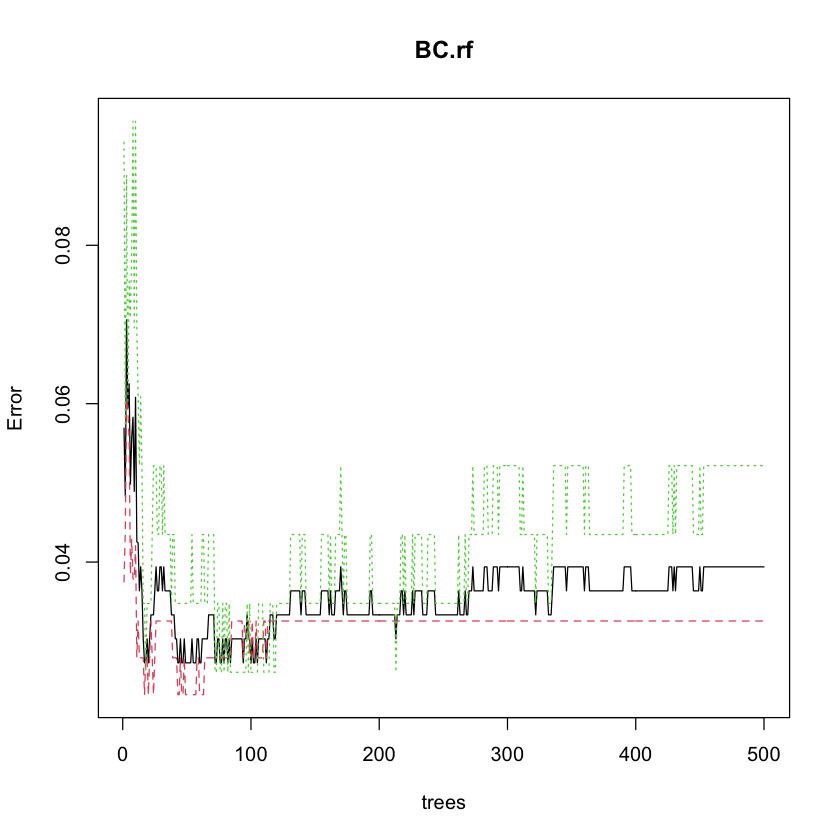

In [28]:
plot(BC.rf)

In [29]:
BC.rf$importance

,MeanDecreaseGini
Cl.thickness,8.675436
Cell.size,35.860550
Cell.shape,24.213460
Marg.adhesion,6.888042
Epith.c.size,15.583556
Bare.nuclei,20.048237
Bl.cromatin,20.879965
Normal.nucleoli,16.077713
Mitoses,1.079903


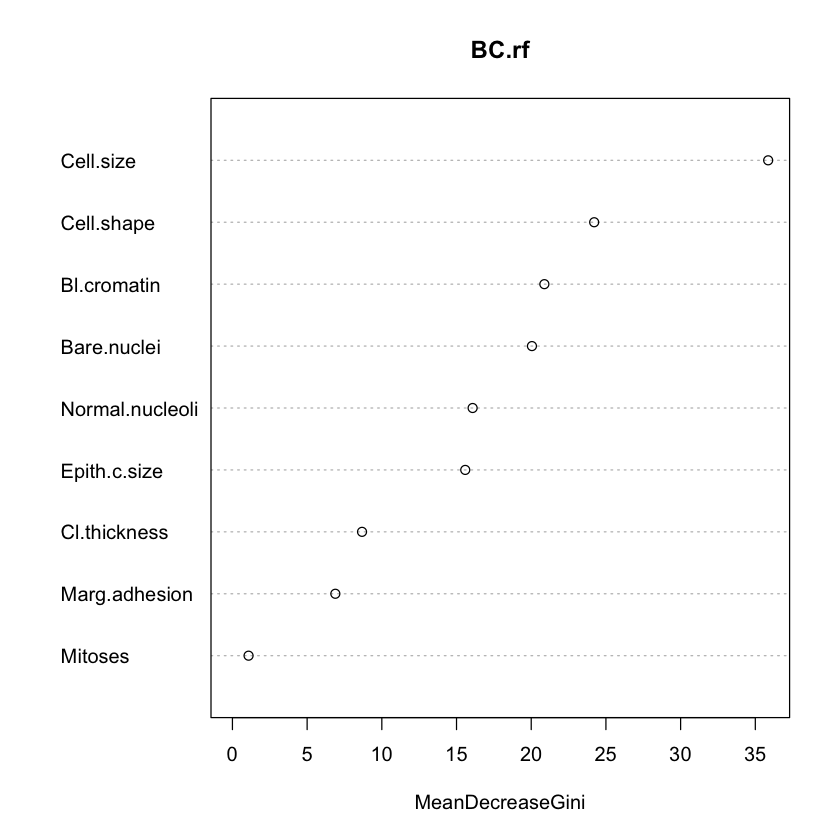

In [30]:
varImpPlot(BC.rf)